<a href="https://colab.research.google.com/github/udaybhaskar717/Dphi/blob/main/BCC_Paper__FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.datasets        import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn                 import ensemble
from sklearn.ensemble        import AdaBoostRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.metrics         import r2_score
from sklearn                 import tree
from google.colab            import files
from sklearn                 import tree
import matplotlib.colors

# EDA

In [ ]:
data=pd.read_excel("/content/BCC_NEW.xlsx")

In [ ]:
data

,Composition,Comment 1,Wt.% H
0,Nb1-xFex,(x=0.004-0.01),2.0-2.1
1,Nb.994Ge.006,NaN,92.1
2,Nb1-xSix,(x=0.01-0.026),2.0-2.1
3,Ni1-xCux,(x=0.1-0.5),0.4-1.2
4,Ni.8Cu.2,NaN,--
...,...,...,...
280,V0.56Ti0.20Cr0.12Mn0.12,NaN,1.85
281,V0.778Ti0.074Zr0.074Ni0.074,NaN,1.35
282,V0.77Ti0.10Cr0.06Fe0.06Zr,NaN,1.82
283,V0.40Ti0.225Cr0.325Fe0.05,NaN,0.75


In [ ]:
df=data[data["Wt.% H"] !='--']

In [ ]:
def remove_fn(m):
    return list(map(float,(''.join(i for i in m if i not in ['X','y','x','(',')','=',"&",'a','n','d',' '])).split('-')))

In [ ]:
index=df[df["Comment 1"].notnull() ].index
index1=[i for i in df.index if i not in index]

In [ ]:
d1=dict()
for t in index1:
    d1[df.loc[t,"Composition"]]=df.loc[t,"Wt.% H"]
l1=dict()
for i in index:
    l1[i]=remove_fn(df.loc[i,"Comment 1"])
print(l1)

{0: [0.004, 0.01], 2: [0.01, 0.026], 3: [0.1, 0.5], 8: [0.0, 0.4], 14: [0.033, 0.162], 16: [0.0, 0.1], 19: [0.075, 0.101], 26: [0.025, 0.075], 27: [0.05, 0.2], 31: [0.02, 0.05], 33: [0.02, 0.05], 40: [0.0, 0.075], 41: [0.025, 0.05], 43: [0.026, 0.083], 45: [0.05, 0.15], 49: [0.05, 0.4], 53: [0.04, 0.1], 55: [0.0, 0.1], 57: [0.025, 0.075], 59: [0.0, 0.1], 62: [0.0, 0.04], 63: [0.02, 0.05], 64: [0.01, 0.04], 67: [0.02, 0.125], 68: [0.11, 0.19], 71: [0.18, 0.33], 72: [0.11, 0.26], 73: [0.14, 0.69], 74: [0.02, 0.35], 76: [0.2, 0.8], 78: [0.2, 0.6], 79: [0.3, 0.8], 81: [0.0, 1.0], 85: [0.005, 0.008], 87: [0.01, 0.049], 88: [0.0, 0.1], 90: [0.001, 0.009], 91: [0.003, 0.011], 96: [0.001, 0.017], 98: [0.004, 0.006], 103: [0.34, 0.5], 116: [0.008, 0.01], 119: [0.23, 0.82], 121: [0.12, 0.25], 123: [0.049, 0.197], 134: [0.02, 0.09], 135: [0.01, 0.03], 136: [0.018, 0.085], 138: [0.05, 0.15], 140: [0.1, 0.3], 153: [0.0, 0.25], 156: [0.1, 0.9], 157: [0.1, 0.9], 166: [0.037, 0.1], 172: [0.2, 0.8], 17

In [ ]:
l2=[]
for i in index:
    if type(df.loc[i,"Wt.% H"])==float:
        df.loc[i,"Wt.% H"]=str(df.loc[i,"Wt.% H"])+'-'+str(df.loc[i,"Wt.% H"])
    l2+=list(map(float,df.loc[i,"Wt.% H"].split('-')))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
X=pd.DataFrame(index=range(len(l1)),columns=["Composition"])

In [ ]:
l3=[]
for i in index:
    string=df.loc[i,"Composition"]
    pos=string.find('-')
    #print(string)
    if (string[pos-1] !='1') or (string[pos-2:pos] =='.1'):
        u=""
        e=pos
        j=1
        while string[e-j] !='.':
            u+=string[e-j]
            j+=1
        k=l1[i]
        for h in k:
            x=string.replace("."+(u)[::-1]+'-x',str((float("0."+(u)[::-1])-h)))
            l3.append(x.replace('x',str(h)))
    else:
        k=l1[i]
        for h in k:
            x=string.replace('1-x',str((1-h)))
            l3.append(x.replace('x',str(h)))
d2=dict()
for g,r in zip(l3,l2):
    d2[g]=r

In [ ]:
def Merge(dict1, dict2):
	res = {**dict1, **dict2}
	return res
	
# Driver code
dict1 =d1
dict2 =d2
dict3 = Merge(dict1, dict2)
print(dict3)

{'Nb.994Ge.006': 92.1, 'Ni.979Fe.021': 1.6, 'Ni.943Fe.057': 1.4, 'Pd.75Ag.25': 0.4, 'Pd.9Ag.1': 0.5, 'Pd.8Ag.2': 0.4, 'Pd.7Ag.3': 0.3, 'Pd.6Ag.4': 0.2, 'Pd.95Bi.05': 0.4, 'Pd.947Ce.053': 0.3, 'Pd.942Ce.058': 0.4, 'Pd.95Co.05': 0.6, 'Pd.9Co.1': 0.5, 'Pd.9Cu.1': 0.5, 'Pd.95Cr.05': 0.6, 'Pd.972Ir.028': 0.5, 'Pd.942Ir.058': 0.4, 'Pd.927Ir.073': 0.1, 'Pd.975Mo.025': 0.5, 'Pd.85Ni.15': 0.5, 'Pd.95Ni.025Rh.025': 0.7, 'Pd.9Ni.05Rh.05': 0.6, 'Pd.825Ni.1Rh.075': 0.7, 'Pd.946Pb.054': 0.4, 'Pd.95Pt.05': 0.6, 'Pd.9Pt.1': 0.4, 'Pd.7Rh.3': 0.9, 'Pd.95Rh.05': 0.7, 'Pd.9Rh.1': 0.6, 'Pd.8Rh.2': 0.8, 'Pd.95Sb.05': 0.5, 'Pd.95Sc.05': 0.5, 'Pd.952Ti.048': 0.4, 'Pd.95U.05': 0.3, 'Pd.98V.02': 0.5, 'Pd.92Y.08': 0.5, 'Ti.95Cr.05': 3.5, 'Ti.93Mn.07': 3.8, 'Ti.5V.5': 3.88, 'Ti.435V.49Fe.075': 3.8, 'Ti.49Zr.51': 2.8, 'Ti.65Zr.35N.19': 1.9, 'Ti.81Zr.19N.25': 2, 'V.99B.01': 3.72, 'V.99Co.01': 3.4, 'V.855Cr.145': 2.3, 'V.99Mo.01': 3.4, 'V.99Nb.01': 3.5, 'V.8Nb.2': 3.1, 'V.991Ni.009': 3.62, 'V.96Si.04': 3.1, 'V.983Ta

In [ ]:
new_data=pd.DataFrame(dict3,index=['Wt.% H',])
new_df=new_data.T
index2=new_df.index

In [ ]:
l4=[]
for i in index2:
    #print(i.find('.'))
    res = [j for j in range(len(i)) if i.startswith('.', j)]
    list1 = res
    list2 = range(len(res))

    zipped_lists = zip(list1, list2)
    sum = [x + y for (x, y) in zipped_lists]
    for l in sum:
        i = i[:l] + "0" + i[l:]
    l4.append(i)
new_df.index=l4

In [ ]:
new_df.drop('Nb0.994Ge0.006',inplace=True)

In [ ]:
new_df

,Wt.% H
Ni0.979Fe0.021,1.6
Ni0.943Fe0.057,1.4
Pd0.75Ag0.25,0.4
Pd0.9Ag0.1,0.5
Pd0.8Ag0.2,0.4
...,...
Ti0.28V0.35Cr00.22Mn00.15,2.4
Ti00.24V0.35Cr00.31000000000000005Mn0.10,2.7
Ti00.28V0.35Cr00.27Mn0.10,2.7
Nb00.97Cr00.03,0.9


In [ ]:
l5=[]
for i in new_df.index:
    test_str =i
    res =re.findall(r'(\w+?)(\d+\.\d+)', test_str)
    l5+=[res]

In [ ]:
l7=[]
for x in l5:
    for y in x:
        if y[0] not in l7:
            l7.append(y[0])
new_dataset=pd.DataFrame(np.zeros((len(l5),len(l7))),columns=l7)

In [ ]:
new_dataset

,Ni,Fe,Pd,Ag,Bi,Ce,Co,Cu,Cr,Ir,...,Ru,Hf,W,Re,Os,Au,Al,Ga,In,Ge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for index,x in enumerate(l5):
    for y in x:
        if y[0] in l7:
            new_dataset.loc[index,y[0]]=float(y[1])
new_dataset["Wt.% H"]=np.array(new_df["Wt.% H"])
elements = new_dataset.columns[:-1]
elements_={}
for i in elements:
    elements_[i]=(new_dataset[i]!=0).sum()

In [ ]:
df_=pd.DataFrame.from_dict(elements_,orient="index")

In [ ]:
values=[]
for i in df_.values:
    values.append(i[0])

In [ ]:
colors = np.random.rand(elements.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

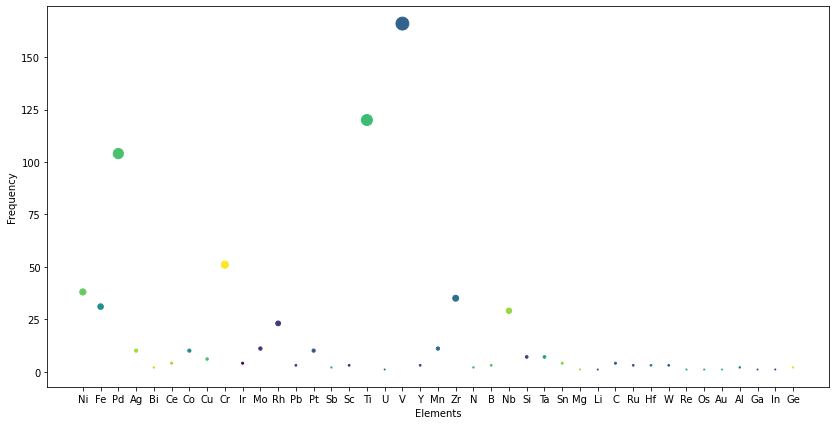

In [ ]:
fig = plt.figure()
plt.scatter(x=df_.index,y=values,s=values,c=colors);
fig.set_figheight(7)
fig.set_figwidth(14)
#plt.grid(linestyle='--',linewidth=0.5)
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.savefig("fig.png")
files.download('fig.png')


In [ ]:
higehst_prevalance=[]
for i in df_.index:
    if df_.loc[i,0]>=5:
       higehst_prevalance.append(i)
X_new=new_dataset[higehst_prevalance]
 

In [ ]:
X_new

,Ni,Fe,Pd,Ag,Co,Cu,Cr,Mo,Rh,Pt,Ti,V,Mn,Zr,Nb,Si,Ta
0,0.979,0.021,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
1,0.943,0.057,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
2,0.000,0.000,0.75,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
3,0.000,0.000,0.90,0.10,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
4,0.000,0.000,0.80,0.20,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.000,0.000,0.00,0.00,0.0,0.0,0.22,0.0,0.0,0.0,0.28,0.35,0.15,0.0,0.00,0.0,0.0
304,0.000,0.000,0.00,0.00,0.0,0.0,0.31,0.0,0.0,0.0,0.24,0.35,0.10,0.0,0.00,0.0,0.0
305,0.000,0.000,0.00,0.00,0.0,0.0,0.27,0.0,0.0,0.0,0.28,0.35,0.10,0.0,0.00,0.0,0.0
306,0.000,0.000,0.00,0.00,0.0,0.0,0.03,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.97,0.0,0.0


# KPCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca_data = KernelPCA(kernel="rbf")   # selecting the default values of gamma 

# fitting  PCA on the standardize data
kpca_data.fit(X_new)

KernelPCA(kernel='rbf')

In [ ]:
X_kpca = kpca_data.transform (X_new)
print('Transformed data is \n {}'.format(X_kpca))
print('Transformed data shape is \n {}'.format(X_kpca.shape))

Transformed data is 
 [[-3.49473650e-03  1.33578459e-02  1.07587685e-01 ...  1.39266376e-10
  -1.34147626e-09  2.29249508e-10]
 [-6.30479901e-03  1.34839079e-02  1.07464045e-01 ... -5.32054401e-11
   1.96649808e-10  5.41717782e-11]
 [-2.22533157e-02  2.03319496e-01 -2.63351860e-02 ...  1.08482254e-08
   7.94148036e-09 -6.18497324e-07]
 ...
 [-5.48813011e-02 -7.41602793e-02  7.64223043e-02 ... -1.39471013e-09
  -1.11476766e-08 -4.44970283e-10]
 [-4.59690019e-03  1.16021950e-02  1.64591463e-01 ... -3.69260533e-09
  -4.22700168e-08  4.00268618e-09]
 [-9.99415727e-03  1.14657401e-02  1.62328927e-01 ... -1.10668452e-09
  -8.39031600e-09  1.56933311e-09]]
Transformed data shape is 
 (308, 164)


In [ ]:
X_kpca.shape

(308, 164)

In [ ]:
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print('Variance along principal directions: \n {} \n'.format(explained_variance_ratio)) 

Variance along principal directions: 
 [3.83369504e-01 2.77359978e-01 9.32561434e-02 6.36427448e-02
 4.78171448e-02 3.61930787e-02 2.95623309e-02 2.95511502e-02
 1.35162988e-02 1.10203106e-02 4.71330133e-03 2.32402771e-03
 1.72269933e-03 1.43610292e-03 1.07090921e-03 8.03779108e-04
 7.82564064e-04 5.32992485e-04 3.81498598e-04 2.05771029e-04
 1.05138012e-04 9.51022191e-05 9.37212144e-05 7.20856998e-05
 6.35511738e-05 5.18807271e-05 3.88279119e-05 3.41766574e-05
 2.67113069e-05 2.16007458e-05 1.97398876e-05 1.88419190e-05
 1.41066963e-05 9.64302982e-06 8.40417466e-06 7.44122131e-06
 6.20333856e-06 5.00099680e-06 4.40664184e-06 4.00138143e-06
 3.66910246e-06 3.30741257e-06 3.22016882e-06 2.92243224e-06
 2.79736173e-06 2.52890234e-06 2.42902491e-06 2.21320264e-06
 1.64285291e-06 1.44417336e-06 1.29390370e-06 1.12544723e-06
 1.08792086e-06 1.02954300e-06 8.70220014e-07 7.68354286e-07
 6.21511763e-07 5.06198009e-07 4.95412176e-07 4.24966578e-07
 4.05235583e-07 3.15113320e-07 2.74751896e-07 

In [ ]:
cumulative_variance_explained_ = np.cumsum (explained_variance_ratio)
print(cumulative_variance_explained_)

[0.3833695  0.66072948 0.75398563 0.81762837 0.86544551 0.90163859
 0.93120092 0.96075207 0.97426837 0.98528868 0.99000199 0.99232601
 0.99404871 0.99548482 0.99655572 0.9973595  0.99814207 0.99867506
 0.99905656 0.99926233 0.99936747 0.99946257 0.99955629 0.99962838
 0.99969193 0.99974381 0.99978264 0.99981681 0.99984352 0.99986513
 0.99988487 0.99990371 0.99991781 0.99992746 0.99993586 0.9999433
 0.99994951 0.99995451 0.99995891 0.99996291 0.99996658 0.99996989
 0.99997311 0.99997603 0.99997883 0.99998136 0.99998379 0.999986
 0.99998765 0.99998909 0.99999038 0.99999151 0.9999926  0.99999363
 0.9999945  0.99999527 0.99999589 0.99999639 0.99999689 0.99999731
 0.99999772 0.99999803 0.99999831 0.99999856 0.9999988  0.99999902
 0.99999916 0.99999925 0.99999933 0.9999994  0.99999947 0.99999952
 0.99999957 0.99999962 0.99999966 0.9999997  0.99999974 0.99999977
 0.9999998  0.99999982 0.99999984 0.99999986 0.99999988 0.9999999
 0.99999991 0.99999992 0.99999993 0.99999994 0.99999995 0.99999995

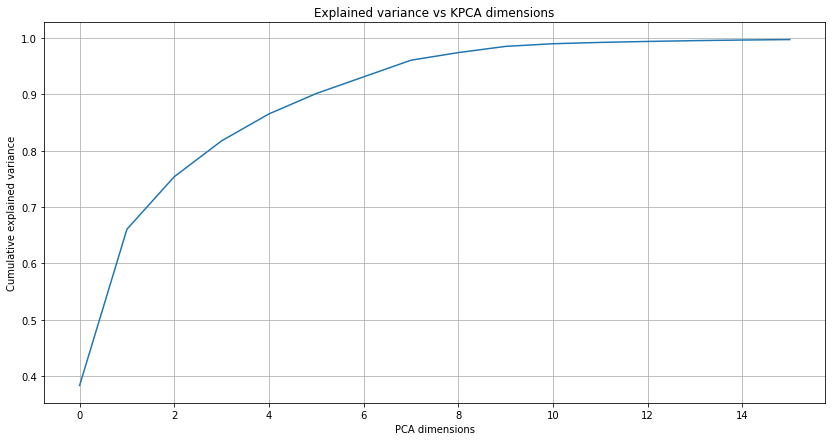

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(14)
plt.plot([i for i in range(16)],cumulative_variance_explained_[:16])
plt.xlabel("PCA dimensions")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs KPCA dimensions")
plt.grid()
plt.show()
plt.savefig("fig.png",bbox_inches='tight')
files.download('fig.png')

In [ ]:
kpca_data = KernelPCA(n_components=10,kernel="rbf")   # selecting the default values of gamma 

# fitting  PCA on the standardize data
kpca_data.fit(X_new)

KernelPCA(kernel='rbf', n_components=10)

In [ ]:
X_kpca = kpca_data.transform (X_new)
print('Transformed data is \n {}'.format(X_kpca))
print('Transformed data shape is \n {}'.format(X_kpca.shape))

Transformed data is 
 [[-3.49473650e-03  1.33578459e-02  1.07587685e-01 ... -8.34981905e-04
   2.71560223e-01  1.91903494e-01]
 [-6.30479901e-03  1.34839079e-02  1.07464045e-01 ... -8.20441019e-04
   2.64533226e-01  1.85388232e-01]
 [-2.22533157e-02  2.03319496e-01 -2.63351860e-02 ... -6.53130997e-05
   7.46390474e-03 -1.65486821e-03]
 ...
 [-5.48813011e-02 -7.41602793e-02  7.64223043e-02 ...  1.40471580e-03
   4.56535986e-02 -6.30182705e-02]
 [-4.59690019e-03  1.16021950e-02  1.64591463e-01 ...  5.30880644e-03
  -3.46296629e-02  8.83048466e-04]
 [-9.99415727e-03  1.14657401e-02  1.62328927e-01 ...  5.01891945e-03
  -1.76834867e-02 -1.78035186e-02]]
Transformed data shape is 
 (308, 10)


# EDA

In [ ]:
X_new.columns

Index(['Ni', 'Fe', 'Pd', 'Ag', 'Co', 'Cu', 'Cr', 'Mo', 'Rh', 'Pt', 'Ti', 'V',
       'Mn', 'Zr', 'Nb', 'Si', 'Ta'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

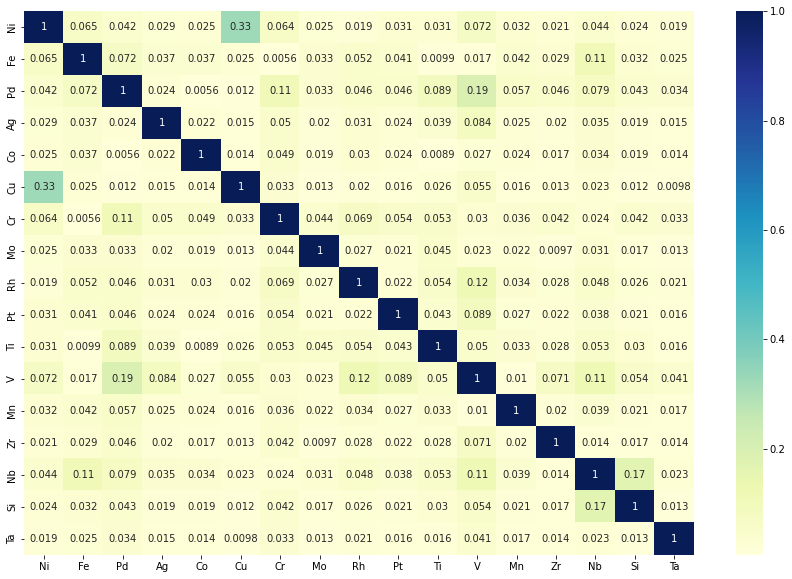

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(np.absolute(X_new.corr()), cmap="YlGnBu",annot=True)
plt.savefig("fig.png")
files.download('fig.png')

In [ ]:
y=new_dataset.iloc[:,-1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_new,new_dataset.iloc[:,-1],train_size=0.85,random_state=42,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.176, random_state= 8,shuffle=True) # 0.25 x 0.8 = 0.2

# Models

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer,mean_absolute_error
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse
def MAE(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    return mae
def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score
def two_scorer():
    return make_scorer(two_score, greater_is_better=True)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train,y_train)

0.687967750316729

In [ ]:
reg.score(X_val,y_val)

0.7347388807387413

In [ ]:
reg.score(X_test,y_test)

0.6214619163595089

## Random Forest

In [ ]:
estimator = RandomForestRegressor(random_state=0)
param_grid = {
 'criterion': ['mae'],
 'max_depth': [20,25,30],
 'max_features':['auto'],
 'n_estimators': [200,250,300],
 'random_state': [0],
 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid, n_jobs=4,return_train_score=True,scoring=two_scorer())
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=4,
             param_grid={'criterion': ['mae'], 'max_depth': [20, 25, 30],
                         'max_features': ['auto'],
                         'n_estimators': [200, 250, 300], 'random_state': [0],
                         'verbose': [0]},
             return_train_score=True, scoring=make_scorer(two_score))

In [ ]:
grid.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=25, n_estimators=200,
                      random_state=0)

In [ ]:
grid.best_params_

{'criterion': 'mae',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 200,
 'random_state': 0,
 'verbose': 0}

In [ ]:
(grid.score(X_train,y_train))

0.9351286954000695

In [ ]:
print("Train:",(grid.score(X_train,y_train)))
print("validation:",(grid.score(X_val,y_val)))
print("Test:",(grid.score(X_test,y_test)))

Train: 0.9351286954000695
validation: 0.8623532818942229
Test: 0.8128430312690247


In [ ]:
print("MSE:{0} \nR2:{1} \n ".format(MSE(y_train,grid.predict(X_train)),(grid.score(X_train,y_train))))
print("MSE:{0} \nR2:{1} \n ".format(MSE(y_val,grid.predict(X_val)),(grid.score(X_val,y_val))))
print("MSE:{0} \nR2:{1} \n ".format(MSE(y_test,grid.predict(X_test)),(grid.score(X_test,y_test))))

MSE:0.11597785077034901 
R2:0.9351286954000695 
 
MSE:0.23940702382978649 
R2:0.8623532818942229 
 
MSE:0.33785003733695756 
R2:0.8128430312690247 
 


In [ ]:
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_train,grid.predict(X_train)),(grid.score(X_train,y_train))))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_val,grid.predict(X_val)),(grid.score(X_val,y_val))))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_test,grid.predict(X_test)),(grid.score(X_test,y_test))))

MAE:0.19 
R2:0.94 
 
MAE:0.35 
R2:0.86 
 
MAE:0.38 
R2:0.81 
 


###  KPCA
**MSE**
1. $MSE: 0.111$

   $R^2: 0.938$
2. $MSE: 0.228$

   $R^2: 0.869$
3. $MSE: 0.331$

   $R^2: 0.817$

**MAE**
1. $MAE:0.19 $

  $R2:0.94 $
 
2. $MAE:0.35$ 

   $R2:0.86$ 
 
3. $MAE:0.38$ 

  $R2:0.81 $

### without kpca
**MSE**

1. $MSE:0.118$

   $R^2:0.934$
  
2. $MSE:0.395$

   $R^2:0.773$

3. $MSE:0.443$

   $R^2:0.754$
**MAE**

1. $ MAE:0.19 $

   $R^2:0.93 $
 
2. $MAE:0.34 $

   $ R^2:0.83$ 
 
3. $MAE:0.41$ 

   $R^2:0.74 $

In [ ]:
rn1_y_pred_train=grid.predict(X_train)
rn1_y_pred_val=grid.predict(X_val)
rn1_y_pred_test=grid.predict(X_test)

## Gradient Boosting Regression

> Indented block



In [ ]:
params = {
    "n_estimators":[400,450],
    "max_depth":[4,6,7],
    "min_samples_split":[10,12],
    "learning_rate":[ 0.005,0.01,],
    "loss": ['squared_error']
}
reg = ensemble.GradientBoostingRegressor()
gb = GridSearchCV(reg, params, n_jobs=-1,return_train_score=True)
gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01],
                         'loss': ['squared_error'], 'max_depth': [4, 6, 7],
                         'min_samples_split': [10, 12],
                         'n_estimators': [400, 450]},
             return_train_score=True)

In [ ]:
gb.best_params_

{'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 10,
 'n_estimators': 450}

In [ ]:
print("Gradient Bossting R^2 Score train: ",(gb.score(X_train,y_train)))
print("Gradient Bossting R^2 Score val:   ",(gb.score(X_val,y_val)))
print("Gradient BosstingR^2 Score test:  ",(gb.score(X_test,y_test)))

Gradient Bossting R^2 Score train:  0.9029766465452836
Gradient Bossting R^2 Score val:    0.8284864303001477
Gradient BosstingR^2 Score test:   0.780584554796637


In [ ]:
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_train,gb.predict(X_train)),(gb.score(X_train,y_train))))
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_val,gb.predict(X_val)),(gb.score(X_val,y_val))))
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_test,gb.predict(X_test)),(gb.score(X_test,y_test))))

MSE:0.17 
R2:0.90 
 
MSE:0.30 
R2:0.83 
 
MSE:0.40 
R2:0.78 
 


In [ ]:
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_train,gb.predict(X_train)),(gb.score(X_train,y_train))))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_val,gb.predict(X_val)),(gb.score(X_val,y_val))))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_test,gb.predict(X_test)),(gb.score(X_test,y_test))))

MAE:0.25 
R2:0.90 
 
MAE:0.33 
R2:0.83 
 
MAE:0.38 
R2:0.78 
 


In [ ]:
xgb_y_pred_train=gb.predict(X_train)
xgb_y_pred_val=gb.predict(X_val)
xgb_y_pred_test=gb.predict(X_test)

### KPCA
**MSE**
1. $MSE: 0.134$

   $R^2:0.925$
 
2. $MSE: 0.252$ 

   $R^2:0.855$
 
3. $MSE: 0.373$

   $R^2:0.793$
**MAE**
1. $MAE:0.153$

   $R^2:0.921$ 
 
2. $MAE:0.306$

   $R^2:0.880$ 
 
3. $MAE:0.347$

   $R^2:0.816$

### Without Kpca
**MSE**
1. MSE:0.17 

  R2:0.90 
 
2. MSE:0.30 

  R2:0.83 
 
3. MSE:0.40 

 R2:0.78 

**MAE**
1. $MAE:0.25$ 

   $R2:0.87$
 
2. $MAE:0.32$

   $R2:0.86$ 
 
3. $MAE:0.38$ 

   $R2:0.78$


## Deep Neual Network


In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
import tensorflow as tf

In [ ]:
from numpy.random import seed
seed(1)


In [ ]:
w_init=tf.random_uniform_initializer(-0.003,0.003)
np.random.seed(42)

In [ ]:
X_train.shape[1]

17

In [ ]:
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow import keras
mc = ModelCheckpoint('best_model.h5', monitor='val_coeff_determination', mode='max', verbose=1, save_best_only=True)
model = keras.Sequential([
    layers.Dense(128, kernel_initializer='normal',activation='relu',input_shape=[X_train.shape[1]]),
    layers.Dense(256, kernel_initializer='normal',activation='relu'),
    layers.Dense(256,  kernel_initializer='normal',activation='relu'),
    layers.Dense(256,  kernel_initializer='normal',activation='relu'),
    layers.Dense(256,  kernel_initializer='normal',activation='relu'),
    layers.Dense(1),
])

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [ ]:
from gc import callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse' , optimizer=optimizer, metrics=[coeff_determination,'mse'])
with tf.device('/gpu:0'):
    history = model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=16,epochs=1500,verbose=1,callbacks=[mc])

Text(0, 0.5, 'Mean Squared Error')

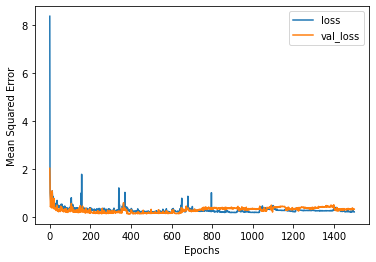

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
# plt.savefig("fig.png")
# files.download('fig.png')

In [ ]:
saved_model = load_model('best_model.h5',custom_objects={"coeff_determination":coeff_determination})


In [ ]:
r2_train =r2_score(y_train,saved_model.predict(X_train))

In [ ]:
r2_test=r2_score(y_test,saved_model.predict(X_test))

In [ ]:
r2_val = r2_score(y_val,saved_model.predict(X_val))

In [ ]:
print("r2 score of train: ",r2_train)
print("r2 score of validation: ",r2_val)
print("r2 score of test : ",r2_test,'\n')


print("Complete R2 score : ",(r2_train+r2_test+r2_val)/3.0)

r2 score of train:  0.8639636666772124
r2 score of validation:  0.9286322762185687
r2 score of test :  0.7743767062916259 

Complete R2 score :  0.8556575497291358


In [ ]:
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_train,saved_model.predict(X_train)),r2_train))
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_val,saved_model.predict(X_val)),r2_val))
print("MSE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MSE(y_test,saved_model.predict(X_test)),r2_test))

MSE:0.24 
R2:0.86 
 
MSE:0.12 
R2:0.93 
 
MSE:0.41 
R2:0.77 
 


In [ ]:
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_train,saved_model.predict(X_train)),r2_train))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_val,saved_model.predict(X_val)),r2_val))
print("MAE:{0:0.2f} \nR2:{1:0.2f} \n ".format(MAE(y_test,saved_model.predict(X_test)),r2_test))

MAE:0.27 
R2:0.86 
 
MAE:0.24 
R2:0.93 
 
MAE:0.39 
R2:0.77 
 


### KPCA
**MSE**
1. $MSE: 0.239$

   $R2:0.866$
 
2. $MSE: 0.166$

   $R2:0.904$
 
3. $MSE: 0.336$

   $R2:0.814$
**MAE**
1. $MAE:0.245$

   $R^2:0.856$
 
2. $MAE: 0.258$

   $R^2:0.914$
 
3. $MAE: 0.339$

   $R^2:0.817$
**Without KPCA**
**MSE** 

1. $MSE:0.24$ 

   $R^2:0.86$ 
 
2. $MSE:0.12$

   $R^2:0.93$ 
 
3. $MSE:0.41$ 

   $R^2:0.77$ 
**MAE**
1. $MAE:0.22$

   $R^2:0.84$ 
 
2. $MAE:0.19$ 

   $R^2:0.94$
 
3. $MAE:0.40$

   $R^2:0.76$


## K Nearest  Neighbours

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_params = { 'n_neighbors' : [i for i in range(1,16)],
               'weights' : ['uniform','distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'metric' : ['euclidean','minkowski']}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1,n_jobs = -1)

In [ ]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gs.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 7,
 'weights': 'uniform'}

In [ ]:
print("\n Train score : ",gs.score(X_train,y_train),
"\n Validation score:",gs.score(X_val,y_val),
"\n Test Score :",gs.score(X_test,y_test),
"\n Total score:",(gs.score(X_train,y_train)+gs.score(X_val,y_val)+gs.score(X_test,y_test))/3.0)


 Train score :  0.7994353953929206 
 Validation score: 0.766095132164888 
 Test Score : 0.8004526033734016 
 Total score: 0.7886610436437368


TypeError: ignored

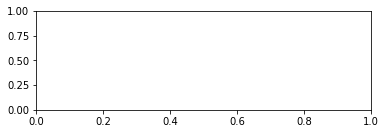

In [ ]:
from sklearn import neighbors
n_neighbors =7
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = gs.predict(X_train)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train[:,1], y_train, color="darkorange", label="data")
    plt.plot(X_train[:,1], y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

    plt.tight_layout()
    plt.show()
    plt.savefig("fig.tiff")
    files.download('fig.tiff')

One of the Most commonly used algorithms is K-Nearest Neighbors in machine Learning.It is a Lazy algorithm,has no or extremely short training phase compared to others.But Generating predictions will be slower.During training phase it stores the all data points using different Types of Data Structures.To make predictions,It finds the similarity between new sample and every data point in the training data set.Then it takes K nearest points and Averages them to find output variable.Similarity Between two points can be found by using the 3 different metrics:




\textbf{Euclidean Distance:} The sqare root over the sum of sqaures of difference between the  components of x and y.
\begin{equation}
   d(x,y)= \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}=\sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + (x_3-y_3)^2 + --+(x_n-y_n)^2}
\end{equation}
\textbf{Manhattan distance:}the sum of the absolute values of differences between the components of x and y coordinates:
\begin{equation}
    d(x,y) = \sum_{i=1}^{n} |x_i - y_i|
\end{equation}
\textbf{Minkowski distance} is the generalization of the above two techniques. It has a parameter p that takes a value of either 1 or 2. When p=1, formula becomes manhattan distance and p=2 for euclidean

\begin{equation}
    minkowski(x,y) = (\sum_{i=1}^n(x_i-y_i)^p)^{1/p}
\end{equation}

After Hyperparameter tuning best Parameters are following 

$'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 7,
 'weights': 'uniform'$ 


# Overall $ R^2 $ values of Train,test,validation datatest Using Average Ensembling method :


In [ ]:
y_pred_train=(rn1_y_pred_train+xgb_y_pred_train)/2.0
y_pred_val=(rn1_y_pred_val+xgb_y_pred_val)/2.0
y_pred_test=(rn1_y_pred_test+xgb_y_pred_test)/2.0

In [ ]:
print("r2 score of train: ",r2_score(y_train, y_pred_train))
print("r2 score of validation: ",r2_score(y_val, y_pred_val))
print("r2 score of test : ",r2_score(y_test, y_pred_test),'\n')


print("Complete R2 score : ",(r2_score(y_train, y_pred_train)+r2_score(y_val, y_pred_val)+r2_score(y_test, y_pred_test))/3.0)

# Important Features

## Gradient Bossting

In [ ]:
feat_imp = pd.Series(reg.feature_importances_,X_new.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure (figsize=(8,5))
plt.show()

ValueError: ignored

## Random Forest

In [ ]:
importance =grid.best_estimator_.feature_importances_
x=dict()
for i,v in enumerate(importance):
  #print('Feature : {0}  , Score{1} '.format(X_train.columns[i],round(v,2)))
  x[X_train.columns[i]]=round(v,2)
#print(x)
x=pd.DataFrame.from_dict(x,orient='index')
x.sort_values(0,ascending=False,inplace=True)
plt.figure (figsize=(6,6))
sns.barplot(x=x.index,y=0,data=x)
plt.xticks(rotation=90);

# Plotting

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train["Pd"],X_train["V"],y_train,c=y_train)
plt.xlim((0,1))

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Gradient Boosting Model")
plt.scatter(X_train["Pd"],y_train)
plt.plot(X_train["Pd"],reg.predict(X_train),color='r')
plt.show()

## Tree Diagram Of Random Forest

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(grid.best_estimator_.estimators_[0], 
 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.save("fig.jpg")
#files.download('fig.png')
files.download('fig.jpg')

In [ ]:
graph.render('figure_name')

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","green","blue","Grey"])

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(X_train["Ti"],X_train["Pd"],c=grid.predict(X_train),cmap='plasma');
#ax.view_init(60,10)

## ViolinPlot

In [ ]:
Data=X_new.copy()
Data["%wt H"] = new_dataset.iloc[:,-1]
Data["Materials"]=0
for i in Data.index:
    for j in ["Nb","Pd","Fe","V","Ti","Zr","Cr","Ni"]:
        if Data.loc[i,j] >= 0.5:
            Data.loc[i,"Materials"]=j
Data.drop(Data[Data["Materials"]==0].index,inplace=True)
Data.drop(0,inplace=True)

In [ ]:
plt.figure(figsize=(15,8))	
sns.set(style = 'whitegrid')

sns.violinplot(x ="Materials",y ="%wt H",data = Data);
plt.savefig("fig.png")
files.download('fig.png')